In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


Mounted at /content/drive
Found 10015 files belonging to 7 classes.
Using 8012 files for training.
Found 10015 files belonging to 7 classes.
Using 2003 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 1,870,407 (7.14 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1798s 7s/step - accuracy: 0.4826 - loss: 3.6993 - val_accuracy: 0.6590 - val_loss: 1.0849
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 145s 575ms/step - accuracy: 0.7253 - loss: 2.0234 - val_accuracy: 0.7119 - val_loss: 0.9897
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 558ms/step - accuracy: 0.7521 - loss: 1.6483 - val_accuracy: 0.7079 - val_loss: 1.0729
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 139s 552ms/step - accuracy: 0.7888 - loss: 1.3733 - val_accuracy: 0.7304 - val_loss: 0.9743
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 558ms/step - accuracy: 0.8211 - loss: 1.1572 - val_accuracy: 0.7529 - val_loss: 0.8828
Model saved as ham10000_balanced_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/

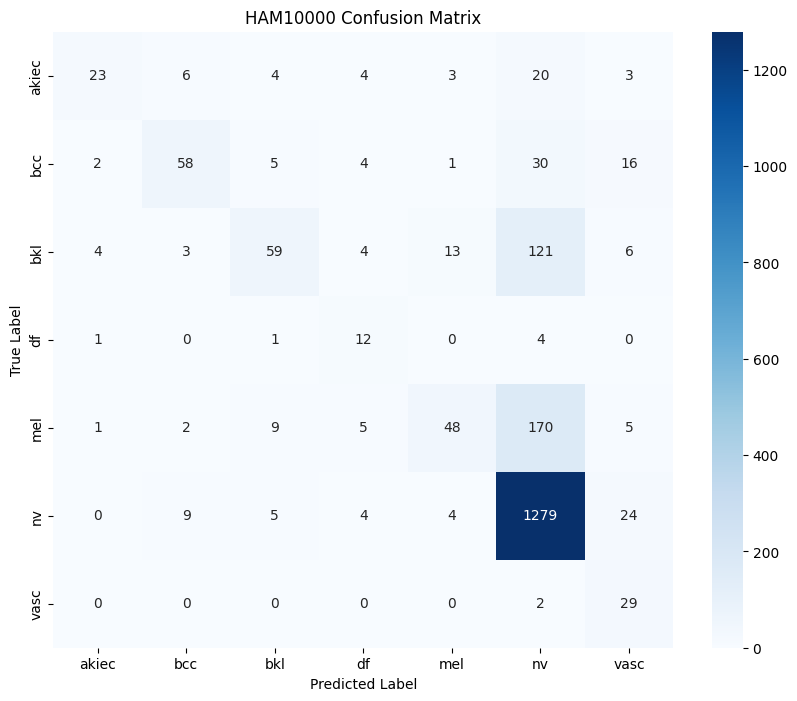

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ================================
# HAM10000 Full Improved Training
# ================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import pandas as pd # Import pandas for data manipulation
import shutil # Import shutil for file operations

# ------------------------------
# Paths
# ------------------------------
data_dir = "/content/drive/MyDrive/capstone/HAM10000"
metadata_path = os.path.join(data_dir, "HAM10000_metadata.csv") # Assuming metadata is here

# ------------------------------
# Load Metadata
# ------------------------------
if not os.path.exists(metadata_path):
    raise FileNotFoundError(f"Metadata file not found at {metadata_path}. Please ensure it exists.")
df = pd.read_csv(metadata_path)

# ------------------------------
# Data Organization: Move images into class subdirectories
# This is crucial for image_dataset_from_directory to work correctly
# ------------------------------
print("Organizing images into class subdirectories...")

# Get a list of all actual image files in the main data_dir
all_image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# Iterate through the DataFrame to move images into class-specific subdirectories
for index, row in df.iterrows():
    image_id = row['image_id']
    dx = row['dx'] # This is the class label

    original_filename = f"{image_id}.jpg" # Assuming all images are .jpg, adjust if needed
    original_filepath = os.path.join(data_dir, original_filename)

    target_class_dir = os.path.join(data_dir, dx)
    os.makedirs(target_class_dir, exist_ok=True) # Create class subdirectory if it doesn't exist

    target_filepath = os.path.join(target_class_dir, original_filename)

    # Only move the image if it exists in the root and hasn't been moved yet
    if os.path.exists(original_filepath) and not os.path.exists(target_filepath):
        shutil.move(original_filepath, target_filepath)

print("Image organization complete.")

# ------------------------------
# Class names (HAM10000 official)
# ------------------------------
class_names = sorted(df['dx'].unique().tolist()) # Dynamically get class names from metadata
num_classes = len(class_names)
print(f"Detected classes: {class_names}")

# ------------------------------
# Load dataset
# ------------------------------
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    subset="training",
    validation_split=0.2,
    seed=1337,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    subset="validation",
    validation_split=0.2,
    seed=1337,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False # IMPORTANT for correct labels in evaluation
)

# Improve performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ------------------------------
# Data Augmentation
# ------------------------------
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# ------------------------------
# Load MobileNetV2 base model
# ------------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# ------------------------------
# Partial Fine-Tuning
# Freeze first 100 layers, train the rest
# ------------------------------
for layer in base_model.layers[:100]:
    layer.trainable = False

for layer in base_model.layers[100:]:
    layer.trainable = True

# ------------------------------
# Build Model
# ------------------------------
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

# ------------------------------
# Class Weights (HAM10000 imbalance)
# ------------------------------
# Recalculate class weights if the distribution changes after data organization
# For simplicity, using the original fixed weights if the distribution is known to be the same
# If distribution might change, you'd need to calculate them based on train_ds labels
class_weights = {
    0: 10,  # akiec
    1: 5,   # bcc
    2: 3,   # bkl
    3: 15,  # df
    4: 4,   # mel
    5: 1,   # nv (majority class)
    6: 10   # vasc
}

# ------------------------------
# Compile Model
# ------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ------------------------------
# Train (≈ 4–6 minutes)
# ------------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights
)

# ------------------------------
# Save Model
# ------------------------------
model.save("ham10000_balanced_model.keras")
print("Model saved as ham10000_balanced_model.keras")

# ------------------------------
# Evaluate Per-Class Accuracy
# ------------------------------
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.title("HAM10000 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.
Loading trained model...
Model loaded successfully!
Running predictions...

📊 Classification Report (Per Disease)

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00         0
         bcc       0.00      0.00      0.00         0
         bkl       0.00      0.00      0.00         0
          df       0.00      0.00      0.00         0
         mel       0.00      0.00      0.00         0
          nv       1.00      0.97      0.99      1861
        vasc       0.80      0.98      0.88       142

    accuracy                           0.97      2003
   macro avg       0.26      0.28      0.27      2003
weighted avg       0.98      0.97      0.98      2003



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

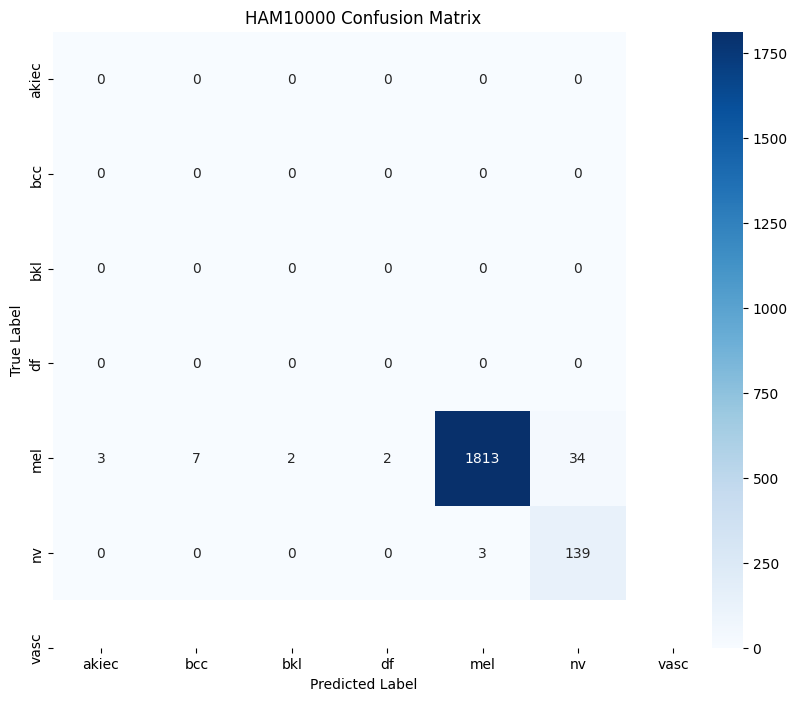

In [ ]:
# =========================================
# HAM10000 Evaluation Script (Matches Training)
# =========================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# ------------------------------
# Class names EXACTLY as training
# ------------------------------
class_names = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]
num_classes = len(class_names)

# ------------------------------
# Paths (MATCH your training file)
# ------------------------------
data_dir = "/content/drive/MyDrive/capstone/HAM10000"
model_path = "/content/ham10000_balanced_model.keras"  # EXACT saved name

# ------------------------------
# Load Validation Set (same split)
# ------------------------------
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset="validation",
    validation_split=0.2,
    seed=1337,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # IMPORTANT for correct labels
)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ------------------------------
# Load Saved Model
# ------------------------------
print("Loading trained model...")
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# ------------------------------
# Run predictions
# ------------------------------
y_true = []
y_pred = []

print("Running predictions...")
for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ------------------------------
# Classification Report
# ------------------------------
print("\n==============================")
print("📊 Classification Report (Per Disease)")
print("==============================\n")
print(classification_report(y_true, y_pred, target_names=class_names, labels=np.arange(num_classes)))

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.title("HAM10000 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
# ================================
# FIXED + IMPROVED HAM10000 TRAINING FILE
# ================================

import tensorflow as tf
import numpy as np
import os
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

print("TensorFlow:", tf.__version__)

# ================================
# 1. MOUNT GOOGLE DRIVE
# ================================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATASET_PATH = "/content/drive/MyDrive/capstone/HAM10000"   # <-- CHANGE IF NEEDED

# ================================
# 2. LOAD DATASET
# ================================
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.20,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.20,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

# ================================
# 3. COMPUTE CLASS WEIGHTS
# ================================
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

all_labels = np.array(all_labels)

class_weights_values = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(all_labels),
    y=all_labels
)

class_weights = {i: w for i, w in enumerate(class_weights_values)}
print("Class Weights:", class_weights)

# ================================
# 4. DATA AUGMENTATION
# ================================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1)
])

# ================================
# 5. BUILD RESNET50 MODEL (UNFROZEN!)
# ================================
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# UNFREEZE MODEL → THIS IS CRITICAL
base_model.trainable = True

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet.preprocess_input(x)
x = base_model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.summary()

# ================================
# 6. OPTIMIZER + COMPILE
# ================================
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Prefetch for speed
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ================================
# 7. CALLBACKS
# ================================
checkpoint_path = "best_model.keras"
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        save_best_only=True,
        monitor="val_accuracy",
        mode="max"
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True
    )
]

# ================================
# 8. TRAIN MODEL
# ================================
EPOCHS = 10     # Balanced: Good accuracy + reasonable speed

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks
)

# ================================
# 9. SAVE FINAL MODEL
# ================================
SAVE_PATH = "/content/drive/MyDrive/resnet50_skin_disease_fixed.keras"
model.save(SAVE_PATH)
print("Model saved to:", SAVE_PATH)


TensorFlow: 2.19.0
Mounted at /content/drive
Found 10015 files belonging to 7 classes.
Using 8012 files for training.
Found 10015 files belonging to 7 classes.
Using 2003 files for validation.
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Class Weights: {0: np.float64(4.319137466307278), 1: np.float64(2.7713593912141126), 2: np.float64(1.3110783832433317), 3: np.float64(12.860353130016051), 4: np.float64(1.2661188369152971), 5: np.float64(0.21389860373227967), 6: np.float64(9.782661782661783)}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 7)         │     14,343 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 23,548,935 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 204s 638ms/step - accuracy: 0.2351 - loss: 1.9887 - val_accuracy: 0.6301 - val_loss: 0.9903
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 158s 627ms/step - accuracy: 0.5331 - loss: 1.2158 - val_accuracy: 0.6610 - val_loss: 0.9117
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 164s 652ms/step - accuracy: 0.6355 - loss: 0.9010 - val_accuracy: 0.6780 - val_loss: 0.8569
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 197s 631ms/step - accuracy: 0.6943 - loss: 0.6990 - val_accuracy: 0.7069 - val_loss: 0.7895
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 155s 615ms/step - accuracy: 0.7222 - loss: 0.5988 - val_accuracy: 0.7139 - val_loss: 0.7793
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 154s 611ms/step - accuracy: 0.7518 - loss: 0.5215 - val_accuracy: 0.7304 - val_loss: 0.7676
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 209s 638ms/step - accuracy: 0.7742 - loss: 0.4464 - val_accuracy: 0.7454 - val_loss: 0.7231
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 152s 604ms/step - accuracy: 0.7832 -

Model Loaded!
Found 10015 files belonging to 7 classes.
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

===== Per-Class Accuracy =====
akiec accuracy: 0.3884
bcc accuracy: 0.8171
bkl accuracy: 0.8863
df accuracy: 0.8609
mel accuracy: 0.6640
nv accuracy: 0.8264
vasc accuracy: 0.9366

===== Classification Report =====
              precision    recall  f1-score   support

       akiec       0.98      0.39      0.56       327
         bcc       0.83      0.82      0.82       514
         bkl       0.49      0.89      0.63      1099
          df       0.72      0.86      0.79       115
         mel       0.57      0.66      0.61      1113
          nv       0.96      0.83      0.89      6705
        vasc       0.88      0.94      0.91       142

    accuracy                           0.80     10015
   macro avg       0.77      0.77      0.74     10015
weighted avg       0.85      0.80      0.81     10015



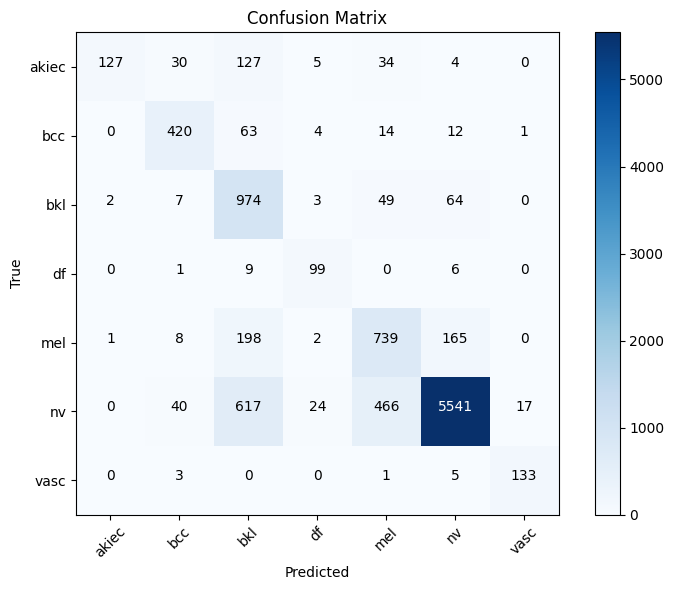

In [ ]:
# =========================================
#   EVALUATION SCRIPT FOR RESNET MODEL
#   Matches your training pipeline exactly
# =========================================

import tensorflow as tf
import numpy as np
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Load your saved model
# ------------------------------------------------------
model_path = "/content/drive/MyDrive/resnet50_skin_disease_fixed.keras"
model = tf.keras.models.load_model(model_path)
print("Model Loaded!")

# ------------------------------------------------------
# Load validation dataset (same settings as training)
# ------------------------------------------------------

data_dir = "/content/drive/MyDrive/capstone/HAM10000"  # ← CHANGED TO CORRECT PATH
img_size = (224, 224)
batch_size = 32

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=False
)

class_names = validation_ds.class_names
num_classes = len(class_names)

print("Classes:", class_names)

# ------------------------------------------------------
# Make predictions
# ------------------------------------------------------
y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images, verbose=0)

    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ------------------------------------------------------
# Per-class accuracy
# ------------------------------------------------------
print("\n===== Per-Class Accuracy =====")
per_class_acc = {}

for i, cls in enumerate(class_names):
    idx = np.where(y_true == i)[0]
    cls_acc = np.mean(y_pred[idx] == y_true[idx])
    per_class_acc[cls] = cls_acc
    print(f"{cls} accuracy: {cls_acc:.4f}")

# ------------------------------------------------------
# Classification Report
# ------------------------------------------------------
print("\n===== Classification Report =====")
print(classification_report(y_true, y_pred, target_names=class_names))

# ------------------------------------------------------
# Confusion Matrix
# ------------------------------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Write numbers in cells
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
